Becker, B. & Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Here is some data description for the adult dataset

Key Features:
1.  Attributes: The dataset consists of 14 attributes, including both continuous and categorical variables. Key features include:
2.  Age: The age of the individual.
3.  Workclass: The type of employment (e.g., Private, Self-employed, Government).
4.  Education: The highest level of education attained (e.g., Bachelors, Masters).
5.  Occupation: The individual's job type (e.g., tech support, Sales).
6.  Hours-per-week: The number of hours worked per week.
7.  Income: The target variable indicates whether the individual earns more than $50,000 annually (binary classification: ">50K" or "<=50K").
8.  Data Size: The dataset contains 32,561 instances
9.  Data Quality: The dataset includes missing values represented by a question mark ("?") in certain fields, which may require preprocessing before analysis.

### Part 1 Intro, install and import

In [2]:
!pip install ucimlrepo --quiet

The cited Adult dataset from the UCI Machine Learning Repository presents a great dataset to be worked upon. This dataset provides a valuable resource for exploring the relationship between demographic, socioeconomic factors, and income level. It can be used to develop predictive models, conduct social science research, and gain insights into income inequality.

In [1]:

#  DATA HANDLING
import pandas as pd
import numpy as np

#  DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  MODELS
from sklearn.linear_model import LogisticRegression


#  METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#  OUTPUT CONFIG
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook')

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

adult_df = pd.concat([X, y], axis=1)
adult_df.head()


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

**Features:**

+  *Demographic Information*:

1. **Age**: Continuous variable representing the individual's age.
2. **Workclass**: Categorical variable indicating the type of employment (e.g., private, government, self-employed).
3. **Education**: Categorical variable specifying the highest level of education attained.
4. **Marital Status**: Categorical variable describing the individual's marital status.
5. **Occupation**: Categorical variable indicating the specific occupation.
6. **Relationship**: Categorical variable representing the individual's relationship status within the household.
7. **Race**: Categorical variable specifying the individual's racial or ethnic background.
8. **Sex**: Categorical variable indicating the individual's gender.
9. **Native Country**: Categorical variable specifying the individual's country of origin.
+ *Socioeconomic Factors*:

1. **fnlwgt**: Continuous variable representing the sampling weight.
2. **Education-num**: Continuous variable indicating the number of years of education.
3. **Capital Gain**: Continuous variable representing capital gains (e.g., from property sales or investments).
4. **Capital Loss**: Continuous variable representing capital losses (e.g., from property sales or investments).
5. **Hours per Week**: Continuous variable indicating the number of hours worked per week.
+ *Target Variable*:

 **Salary:** It is a binary categorical variable indicating whether the individual's annual income exceeds **or** is less than or equal to $50,000.




**Potential Research Questions:**

1. What factors significantly influence an individual's income level?
2. Are there gender or racial disparities in income distribution?
3. How does education level correlate with income?
4. What are the most common occupations among high-income earners?
5. Can a predictive model accurately classify individuals into high-income and low-income categories based on these features?

### Part 2 Data Analysis : Initial Observations

In [ ]:
adult_df.describe(include='all').T

count unique                 top   freq           mean  \
age             48842.0    NaN                 NaN    NaN      38.643585   
workclass         47879      9             Private  33906            NaN   
fnlwgt          48842.0    NaN                 NaN    NaN  189664.134597   
education         48842     16             HS-grad  15784            NaN   
education-num   48842.0    NaN                 NaN    NaN      10.078089   
marital-status    48842      7  Married-civ-spouse  22379            NaN   
occupation        47876     15      Prof-specialty   6172            NaN   
relationship      48842      6             Husband  19716            NaN   
race              48842      5               White  41762            NaN   
sex               48842      2                Male  32650            NaN   
capital-gain    48842.0    NaN                 NaN    NaN    1079.067626   
capital-loss    48842.0    NaN                 NaN    NaN      87.502314   
hours-per-week  48842.0    NaN                 NaN    NaN      40.422382   
native-country    48568     42       United-States  43832            NaN   
income            48842      4               <=50K  24720            NaN   

                          std      min       25%       50%       75%  \
age                  13.71051     17.0      28.0      37.0      48.0   
workclass                 NaN      NaN       NaN       NaN       NaN   
fnlwgt          105604.025423  12285.0  117550.5  178144.5  237642.0   
education                 NaN      NaN       NaN       NaN       NaN   
education-num        2.570973      1.0       9.0      10.0      12.0   
marital-status            NaN      NaN       NaN       NaN       NaN   
occupation                NaN      NaN       NaN       NaN       NaN   
relationship              NaN      NaN       NaN       NaN       NaN   
race                      NaN      NaN       NaN       NaN       NaN   
sex                       NaN      NaN       NaN       NaN       NaN   
capital-gain      7452.019058      0.0       0.0       0.0       0.0   
capital-loss       403.004552      0.0       0.0       0.0       0.0   
hours-per-week      12.391444      1.0      40.0      40.0      45.0   
native-country            NaN      NaN       NaN       NaN       NaN   
income                    NaN      NaN       NaN       NaN       NaN   

                      max  
age                  90.0  
workclass             NaN  
fnlwgt          1490400.0  
education             NaN  
education-num        16.0  
marital-status        NaN  
occupation            NaN  
relationship          NaN  
race                  NaN  
sex                   NaN  
capital-gain      99999.0  
capital-loss       4356.0  
hours-per-week       99.0  
native-country        NaN  
income                NaN

In [ ]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
adult_df.head()


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

from matplotlib import pyplot as plt
_df_28['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['fnlwgt'].plot(kind='hist', bins=20, title='fnlwgt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['education-num'].plot(kind='hist', bins=20, title='education-num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['capital-gain'].plot(kind='hist', bins=20, title='capital-gain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('workclass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('occupation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='age', y='fnlwgt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='fnlwgt', y='education-num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='education-num', y='capital-gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='capital-gain', y='hours-per-week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fnlwgt']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('fnlwgt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('workclass')):
  _plot_series(series, series_name, i)
  fig.legend(title='workclass', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fnlwgt')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fnlwgt']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('fnlwgt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('education')):
  _plot_series(series, series_name, i)
  fig.legend(title='education', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fnlwgt')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fnlwgt']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('fnlwgt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('marital-status')):
  _plot_series(series, series_name, i)
  fig.legend(title='marital-status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fnlwgt')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fnlwgt']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('fnlwgt', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('occupation')):
  _plot_series(series, series_name, i)
  fig.legend(title='occupation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fnlwgt')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_44['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['fnlwgt'].plot(kind='line', figsize=(8, 4), title='fnlwgt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['education-num'].plot(kind='line', figsize=(8, 4), title='education-num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['capital-gain'].plot(kind='line', figsize=(8, 4), title='capital-gain')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in _df_48.groupby('workclass')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('workclass')
_ = plt.ylabel('education')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['marital-status'].value_counts()
    for x_label, grp in _df_49.groupby('education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('education')
_ = plt.ylabel('marital-status')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in _df_50.groupby('marital-status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital-status')
_ = plt.ylabel('occupation')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in _df_51.groupby('occupation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('occupation')
_ = plt.ylabel('relationship')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['workclass'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='age', y='workclass', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='age', y='education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['marital-status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='age', y='marital-status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['occupation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='age', y='occupation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


**Data Integrity:**

*  Null Values: The dataset is notably free of null values.
*  Data Types:
    1. Numeric: Age, Final Weight, Education Number, Capital Gain, Capital Loss, and Hours Per Week are represented as integer data types.
    2.  Categorical: Workclass, Education, Marital Status, Occupation, Relationship, Race, Sex, Native Country, and Income are categorized as object data types.
*  Data Quality:

Missing Values: While the dataset lacks null values, it contains a significant number of '?' values, particularly within the categorical features. These values will require appropriate handling or imputation to ensure data quality and prevent biases in subsequent analysis.

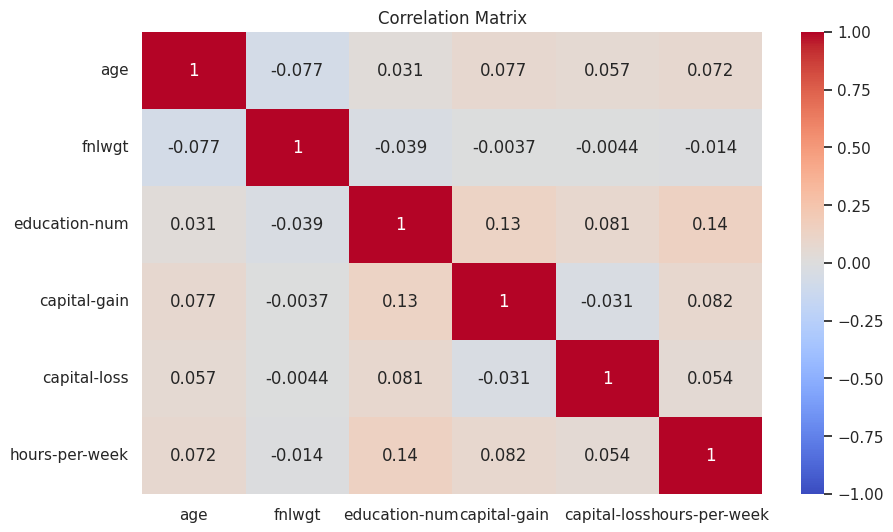

In [8]:
# Correlation Analysis (only for numerical features)
def correlation_analysis(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_cols].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

correlation_analysis(adult_df)


### PART 3 STATISTICAL ANALYSIS:

####3.1 Univariate Analysis:

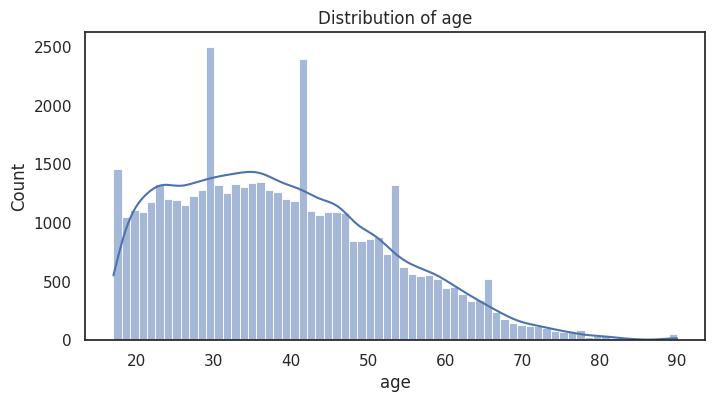

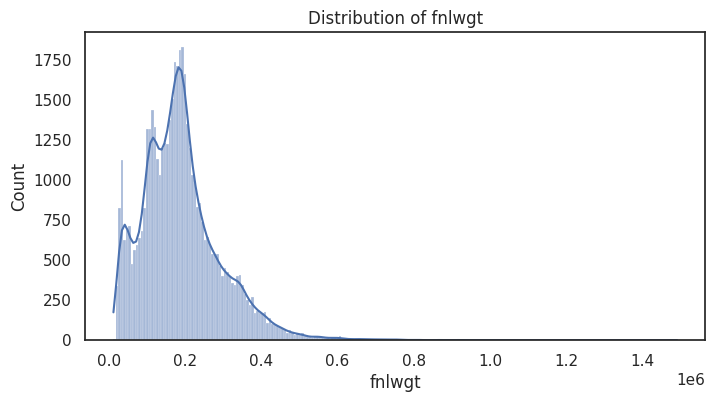

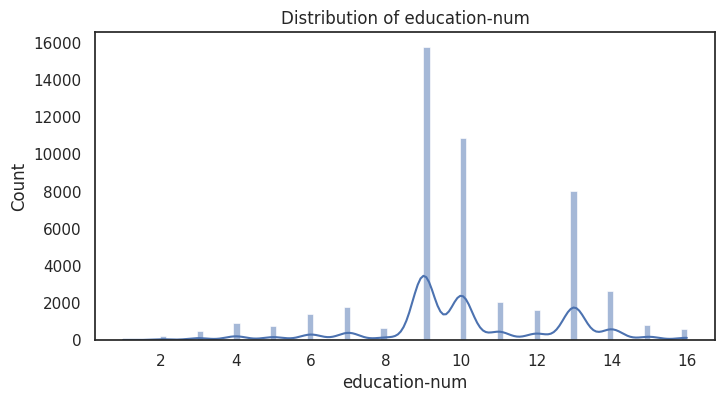

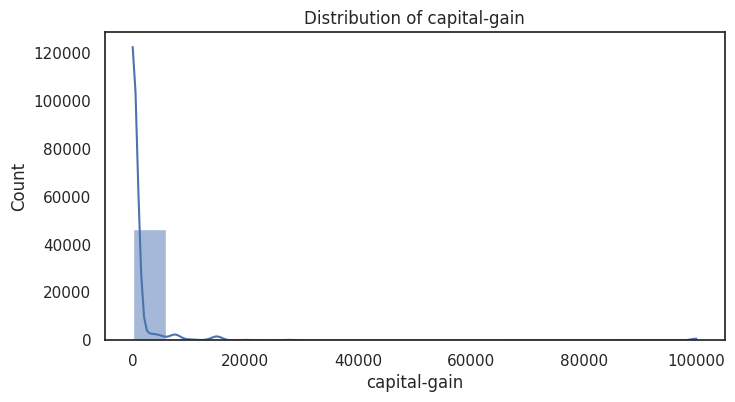

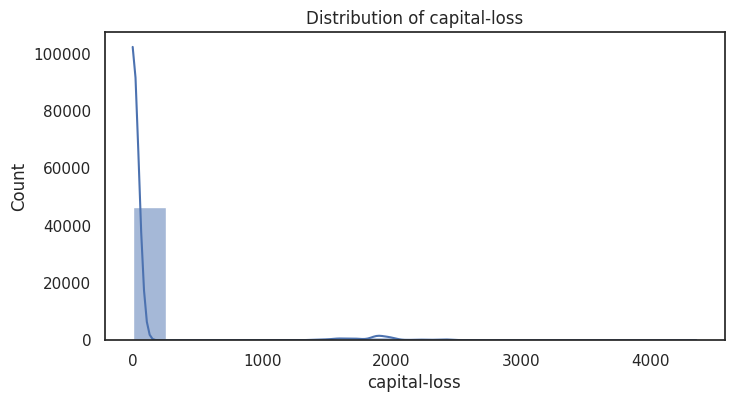

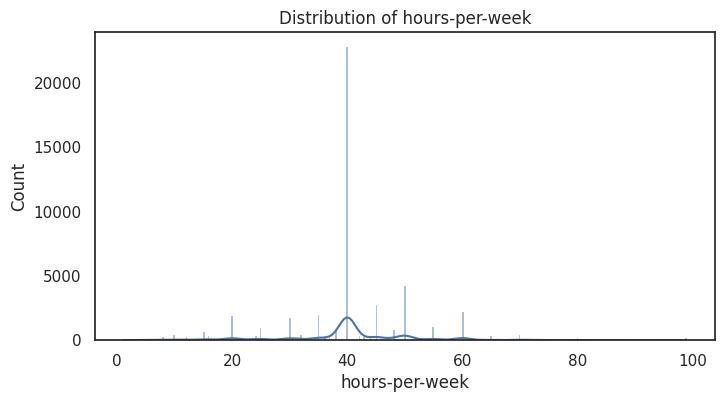

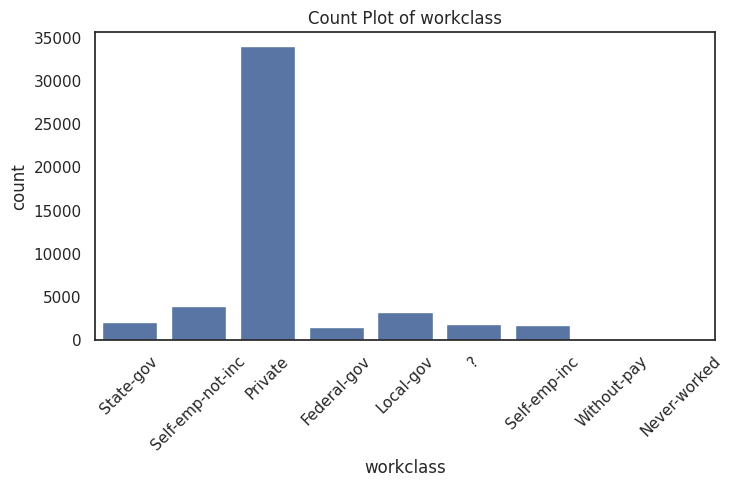

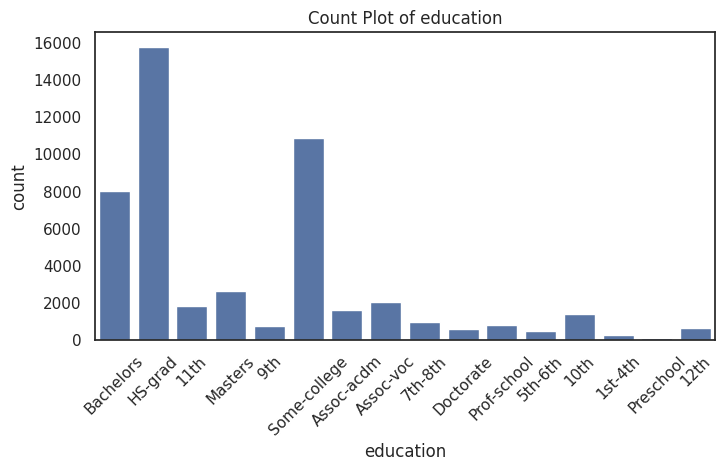

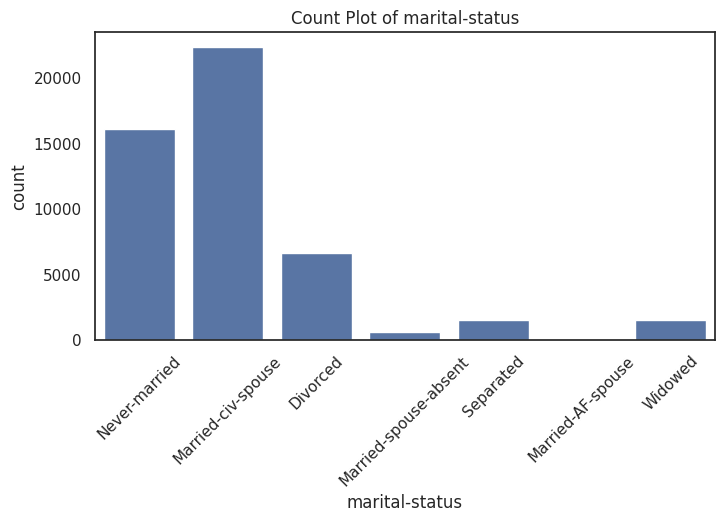

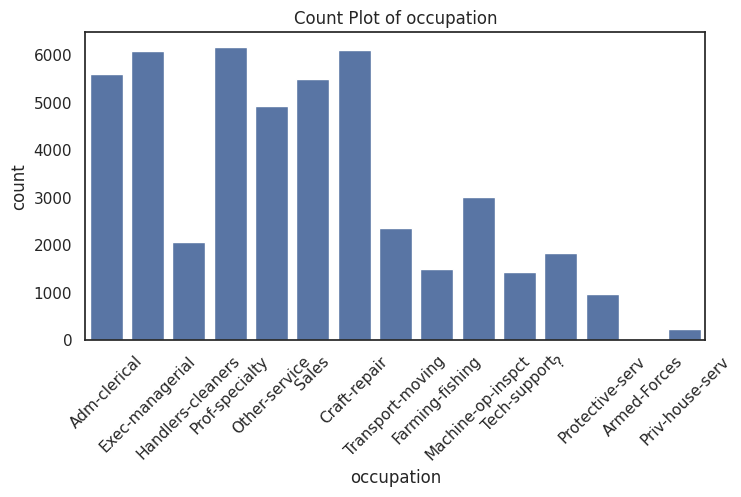

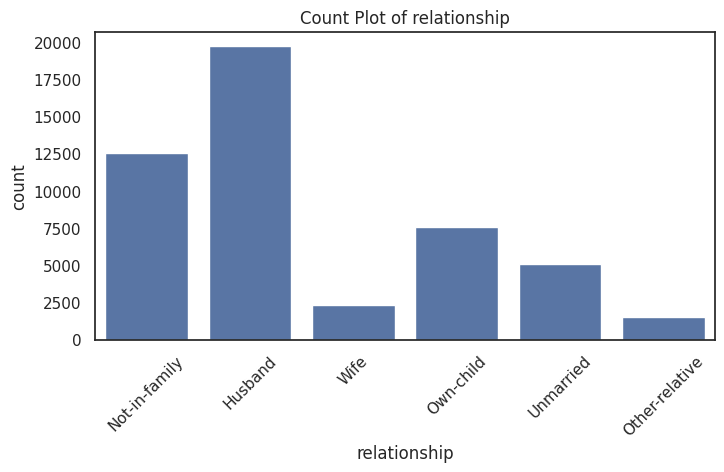

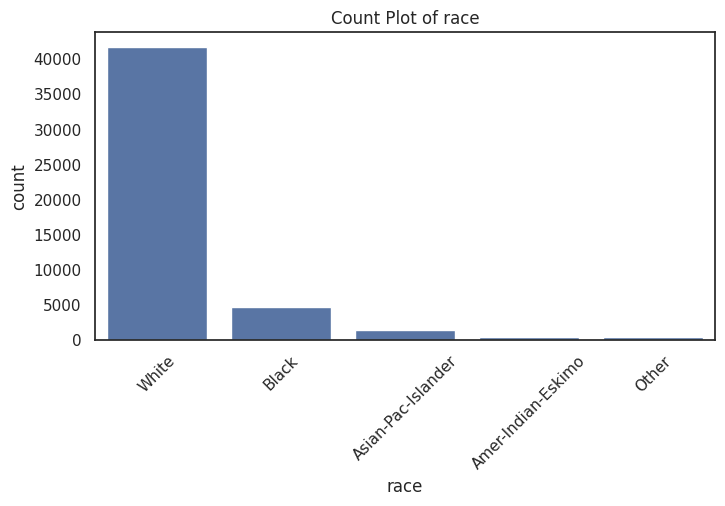

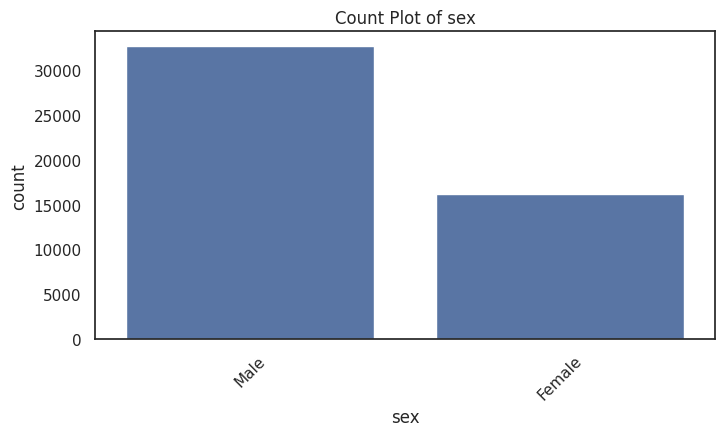

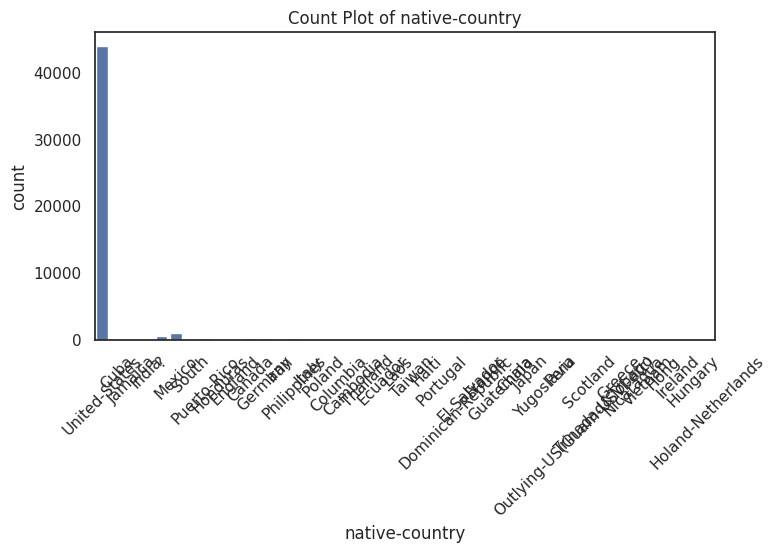

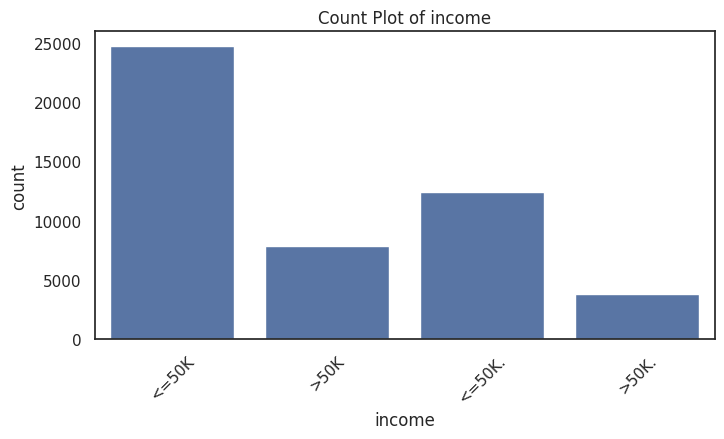

In [4]:
# Univariate Analysis: Numerical Features
def univariate_numerical(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# Univariate Analysis: Categorical Features
def univariate_categorical(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.show()

# Perform univariate analysis on the dataset
univariate_numerical(adult_df)
univariate_categorical(adult_df)


####3.2 Bivariate Analysis

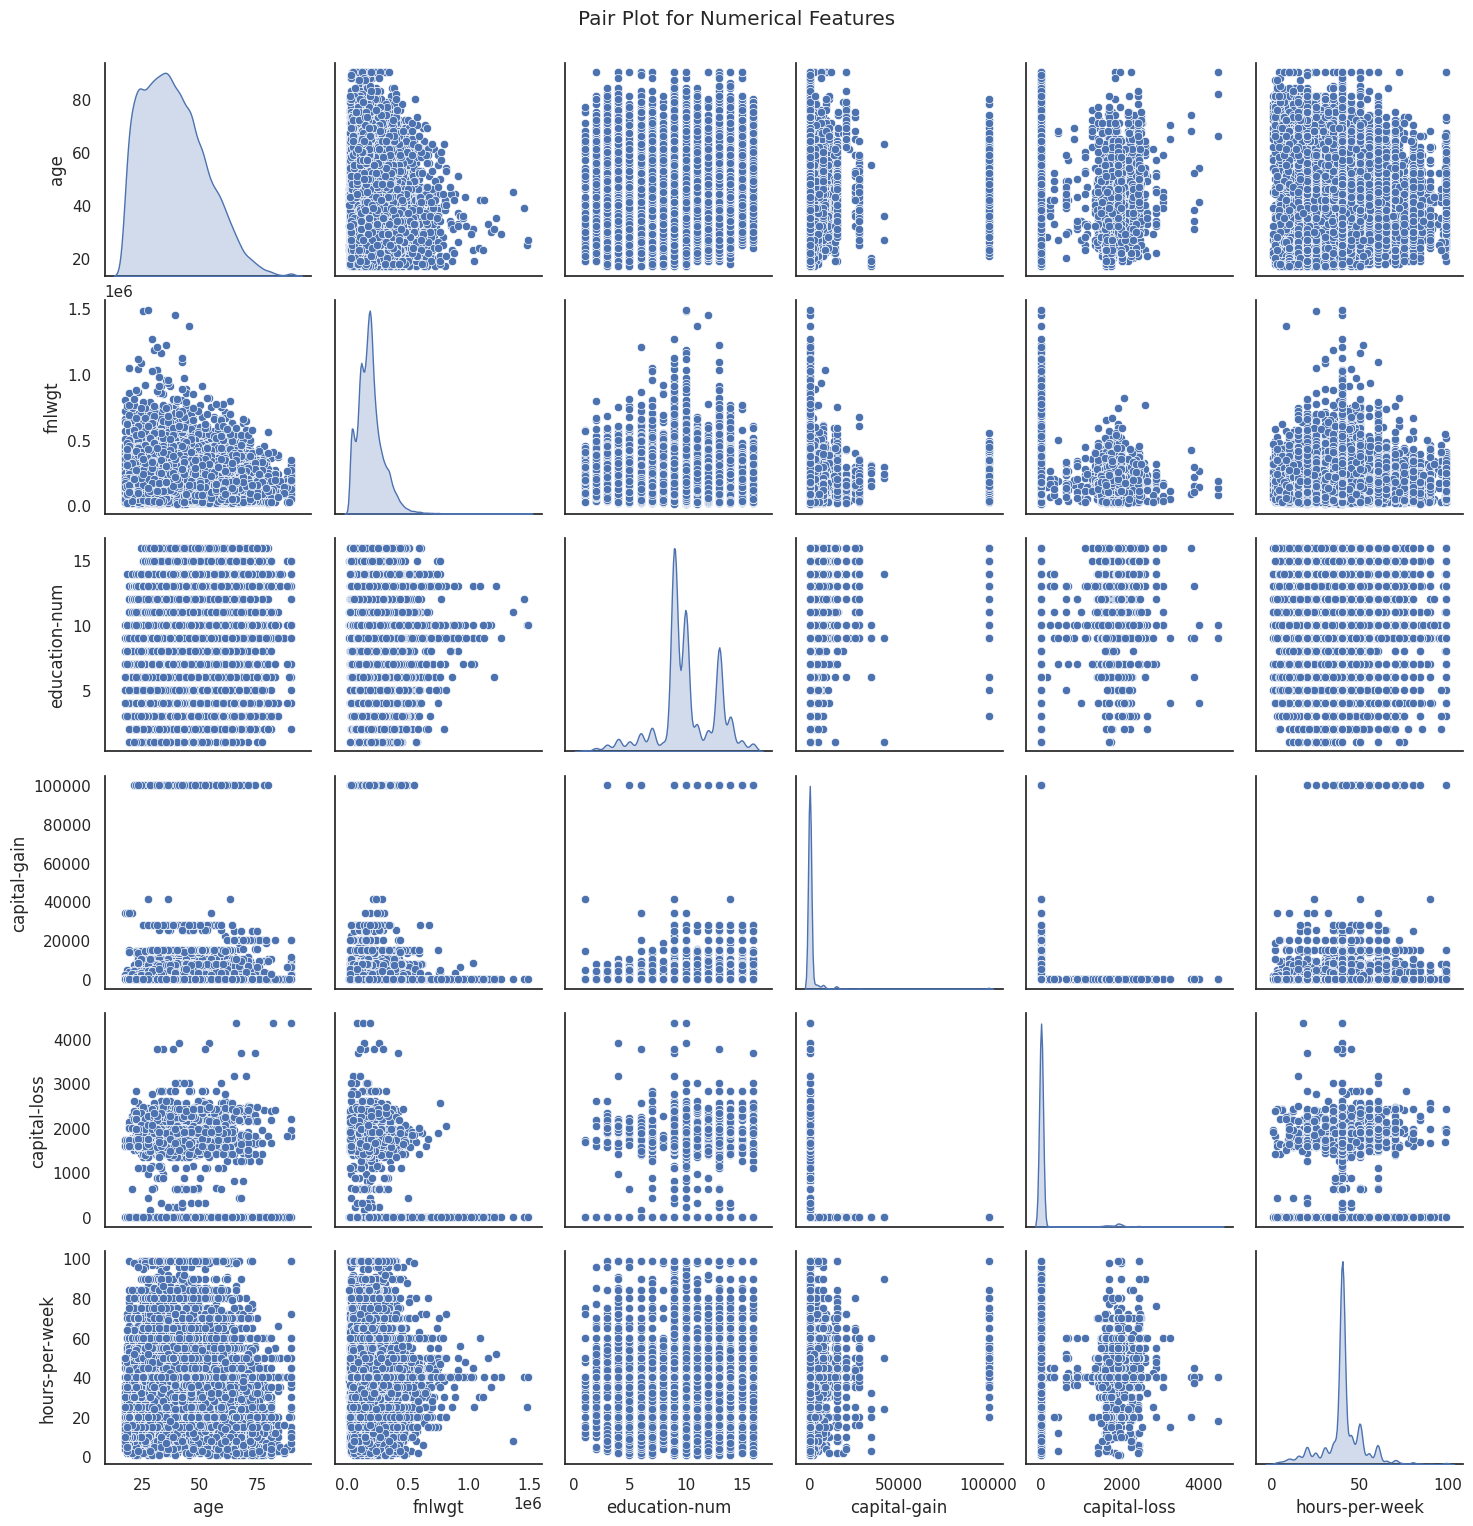

In [5]:
# Bivariate Analysis: Numerical vs Numerical
def bivariate_numerical(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    sns.pairplot(df[numerical_cols], diag_kind='kde')
    plt.suptitle('Pair Plot for Numerical Features', y=1.02)
    plt.show()

bivariate_numerical(adult_df)


In [6]:
# Bivariate Analysis: Categorical vs Categorical (Cross Tabulation)
def bivariate_categorical(df, target_col):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != target_col:
            crosstab = pd.crosstab(df[col], df[target_col])
            print(f'Cross Tabulation between {col} and {target_col}')
            print(crosstab)
            print('\n')

bivariate_categorical(adult_df, target_col='income')  # Assuming 'income' is the target variable


Cross Tabulation between workclass and income
income            <=50K  <=50K.  >50K  >50K.
workclass                                   
?                  1645       0   191      0
Federal-gov         589     282   371    190
Local-gov          1476     733   617    310
Never-worked          7       3     0      0
Private           17733    8786  4963   2424
Self-emp-inc        494     263   622    316
Self-emp-not-inc   1817     968   724    353
State-gov           945     506   353    177
Without-pay          14       5     0      2


Cross Tabulation between education and income
income        <=50K  <=50K.  >50K  >50K.
education                               
10th            871     431    62     25
11th           1115     605    60     32
12th            400     209    33     15
1st-4th         162      77     6      2
5th-6th         317     165    16     11
7th-8th         606     287    40     22
9th             487     228    27     14
Assoc-acdm      802     386   265    148
A

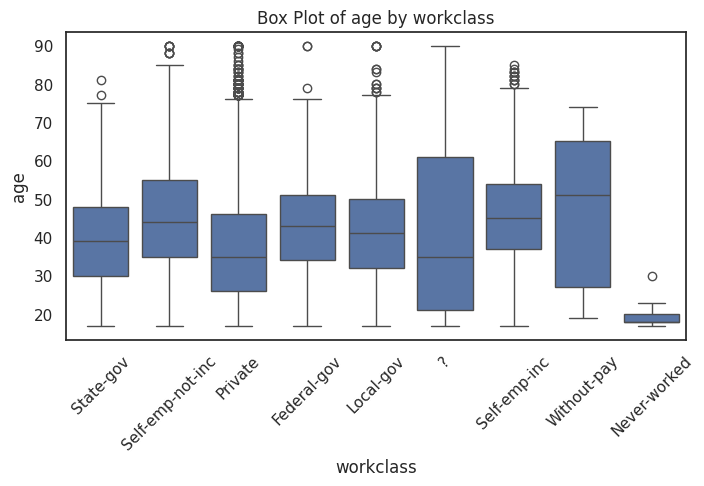

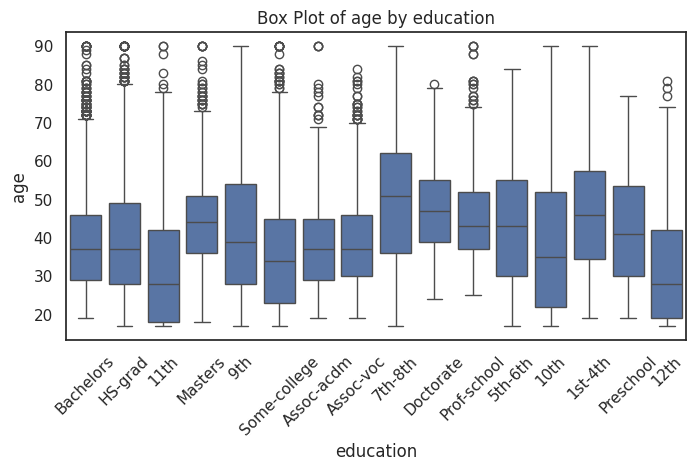

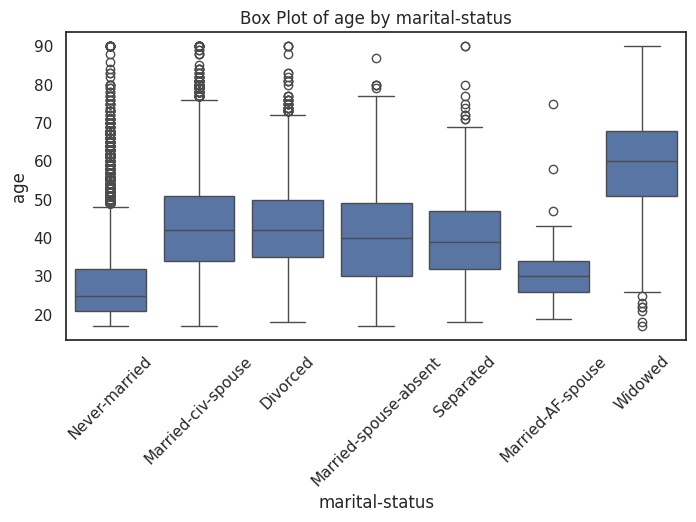

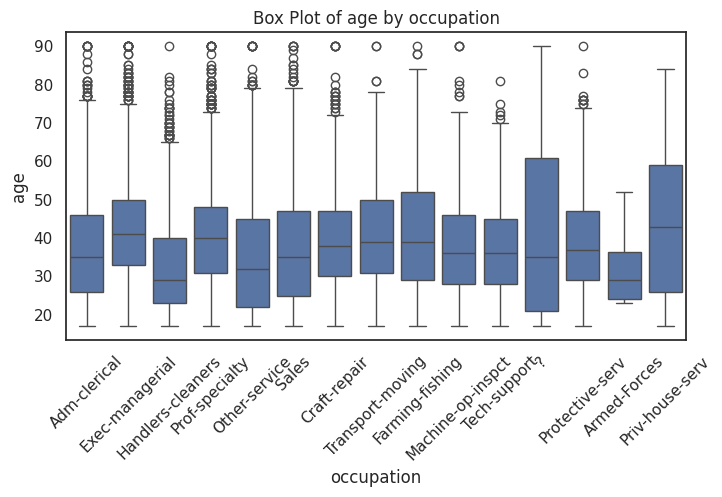

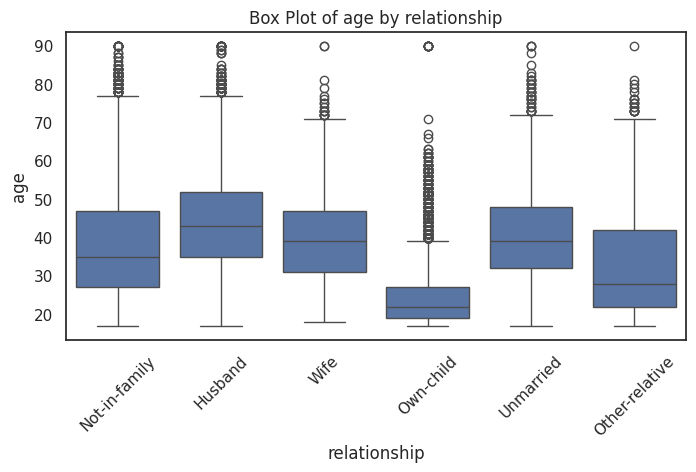

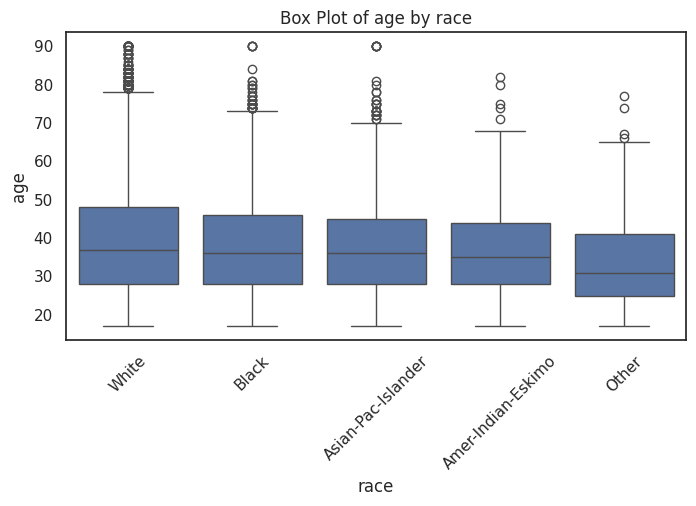

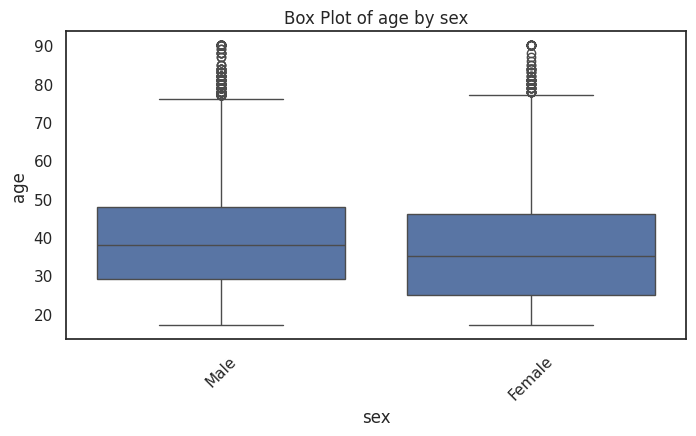

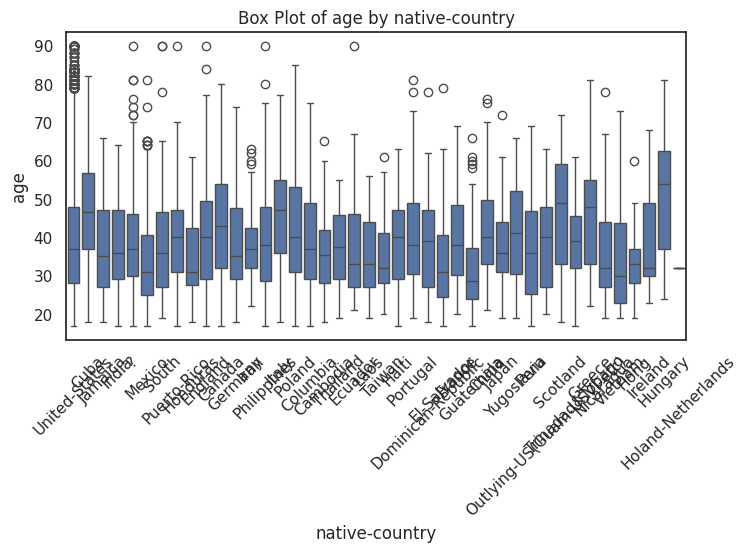

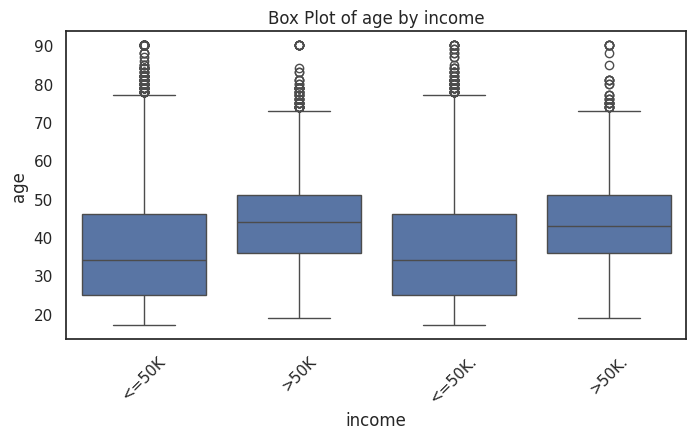

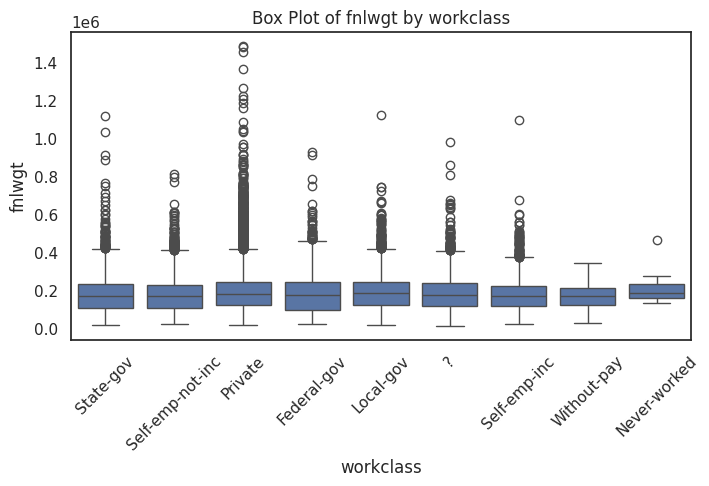

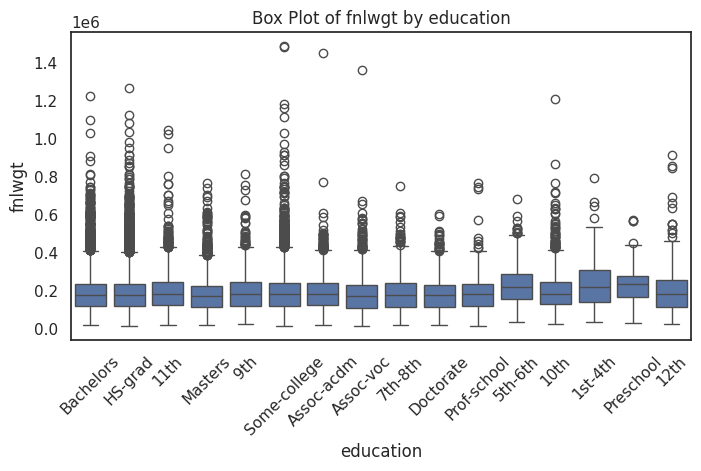

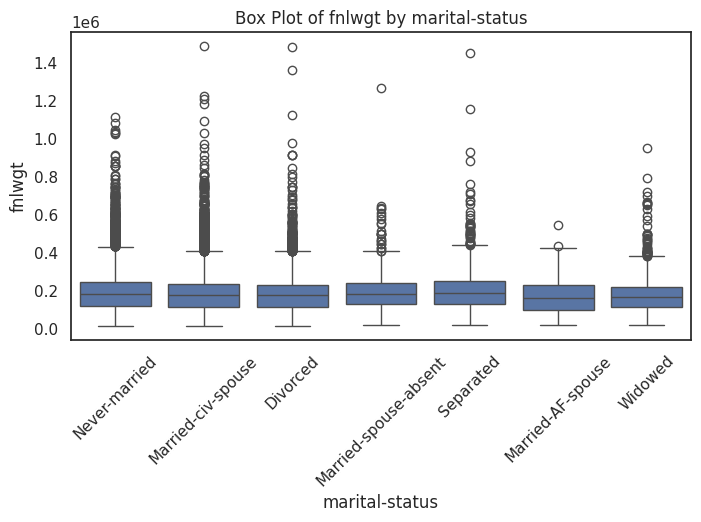

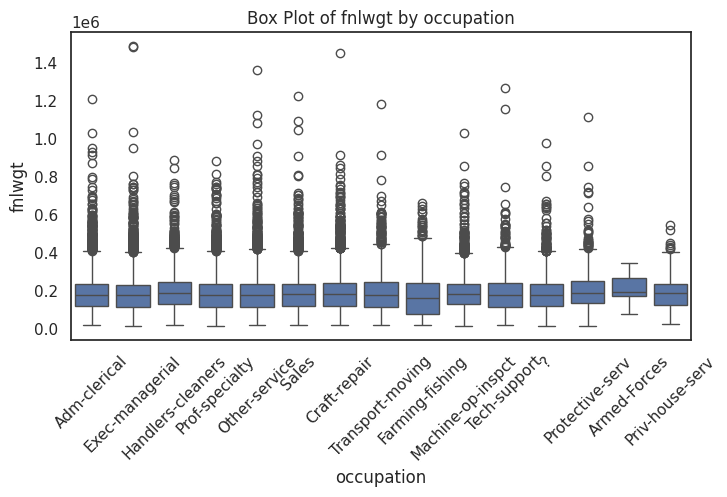

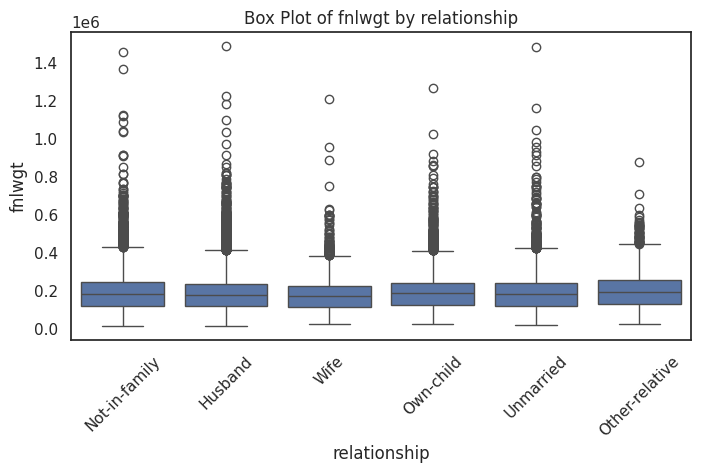

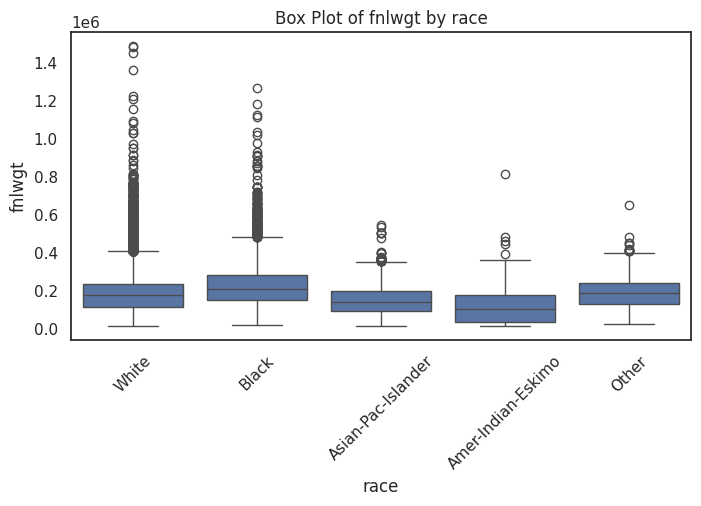

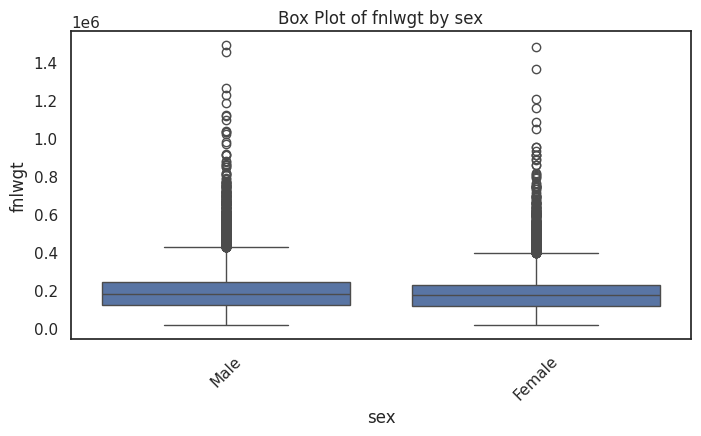

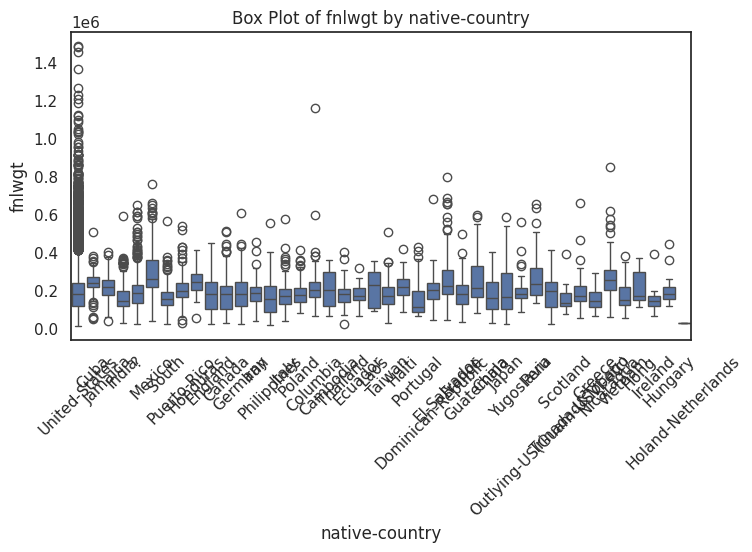

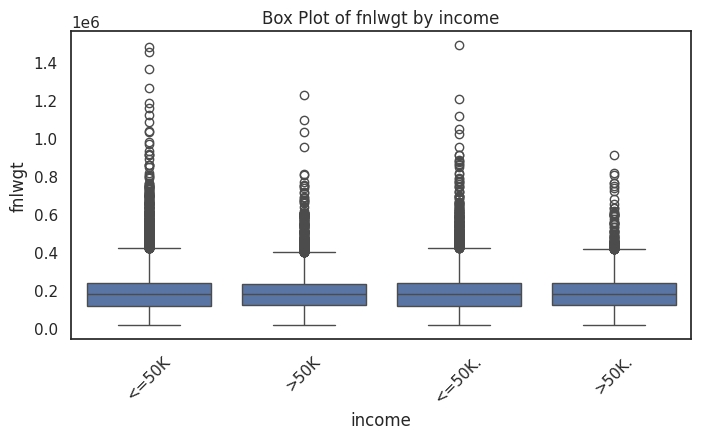

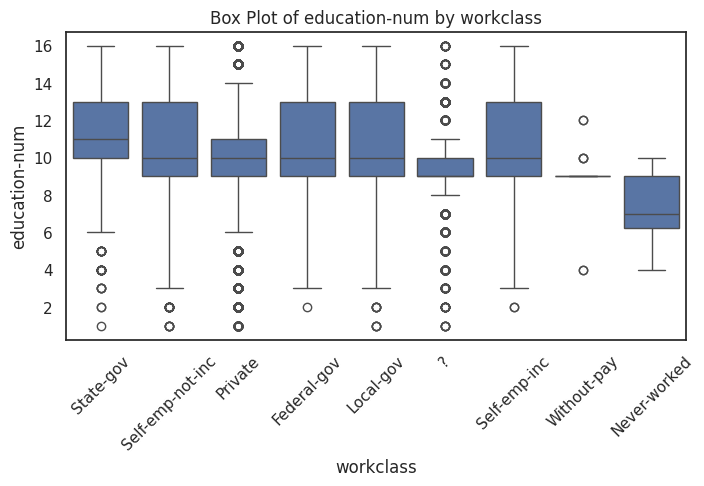

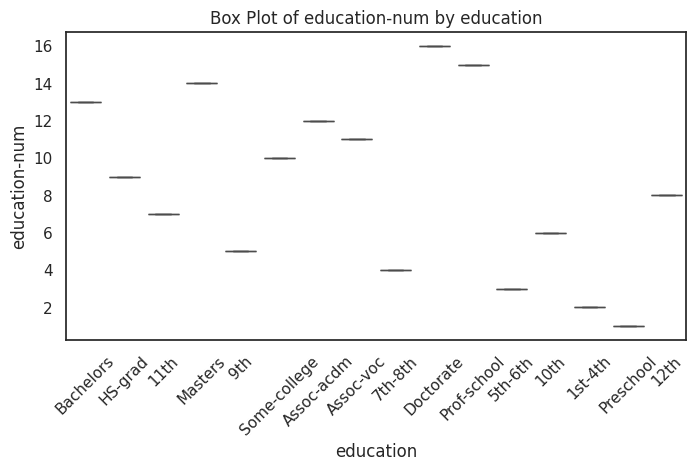

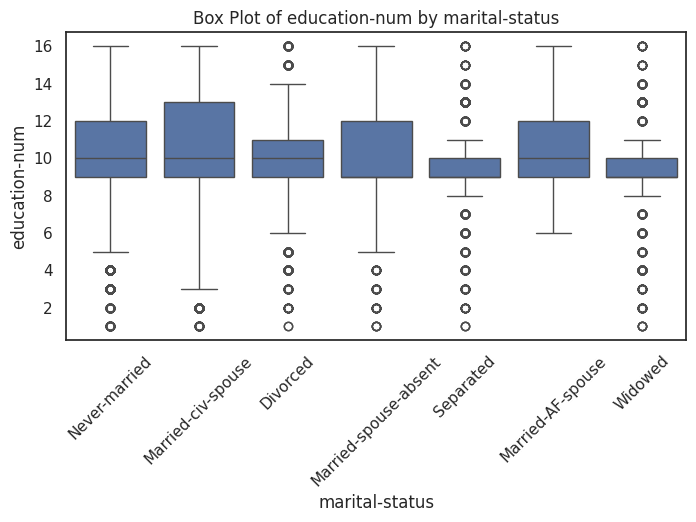

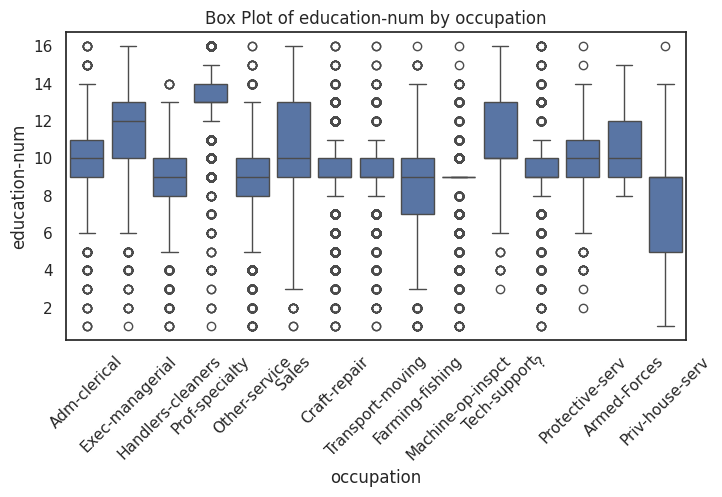

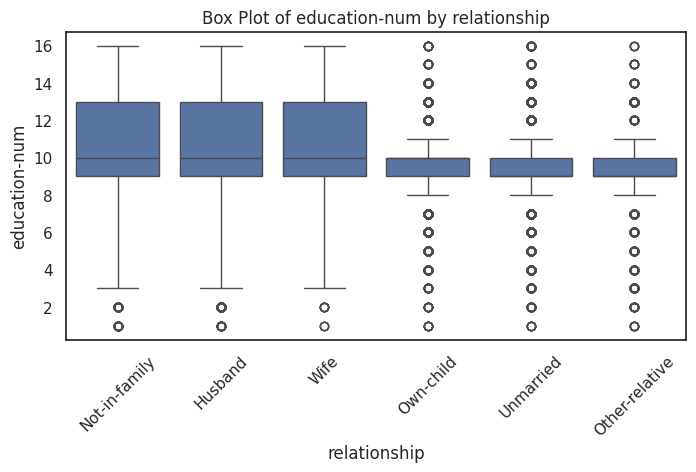

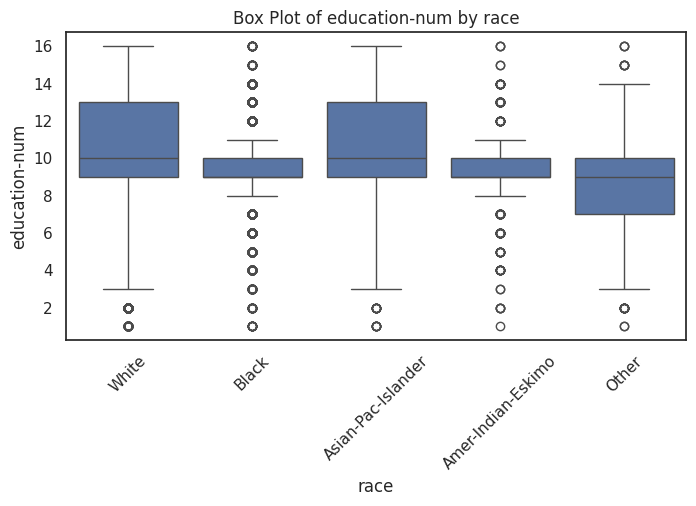

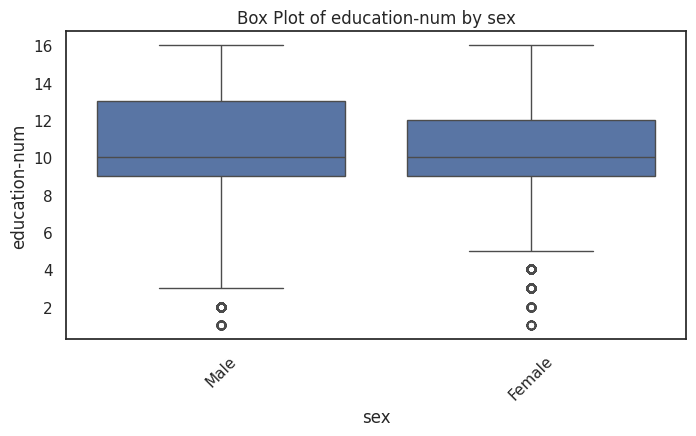

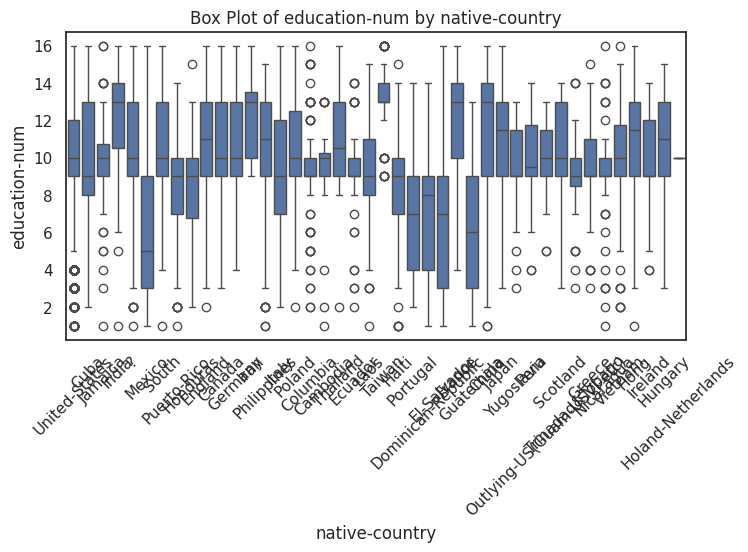

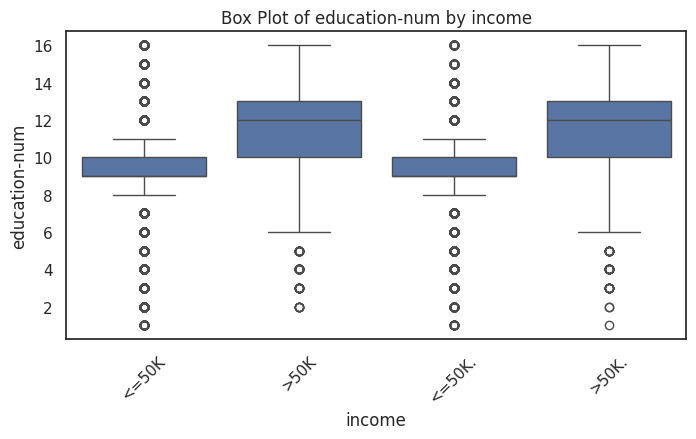

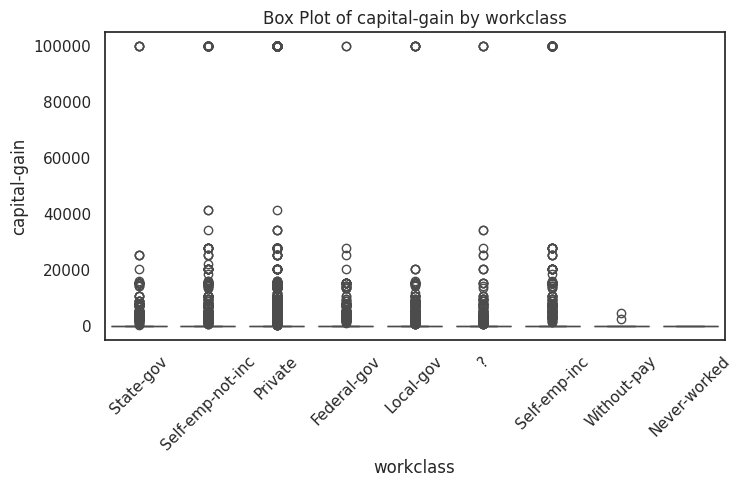

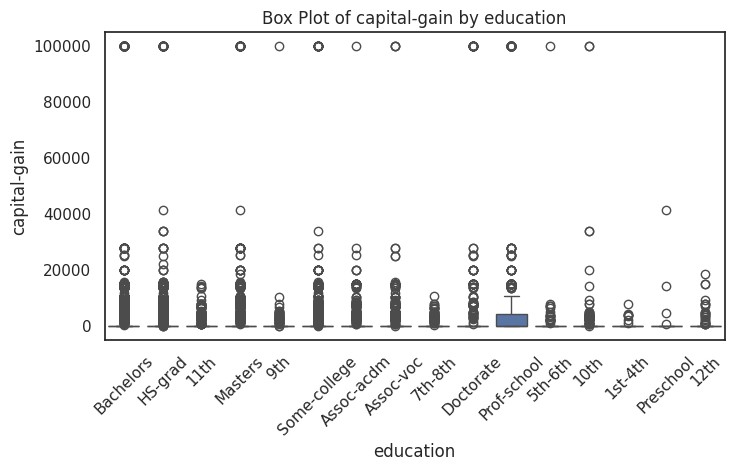

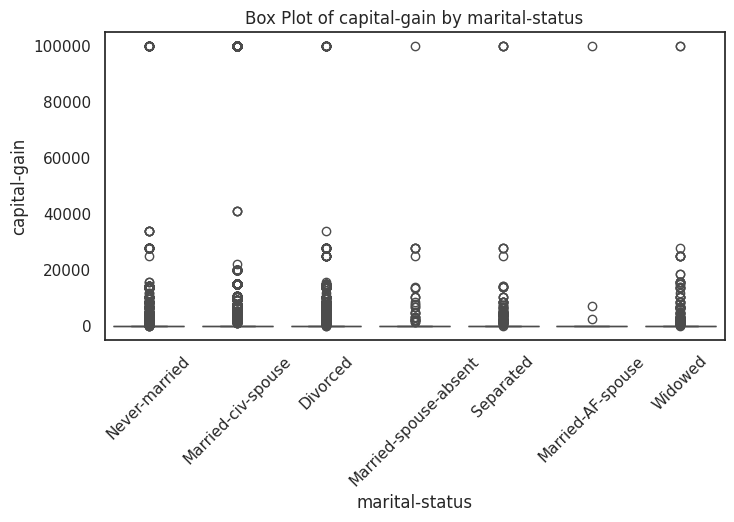

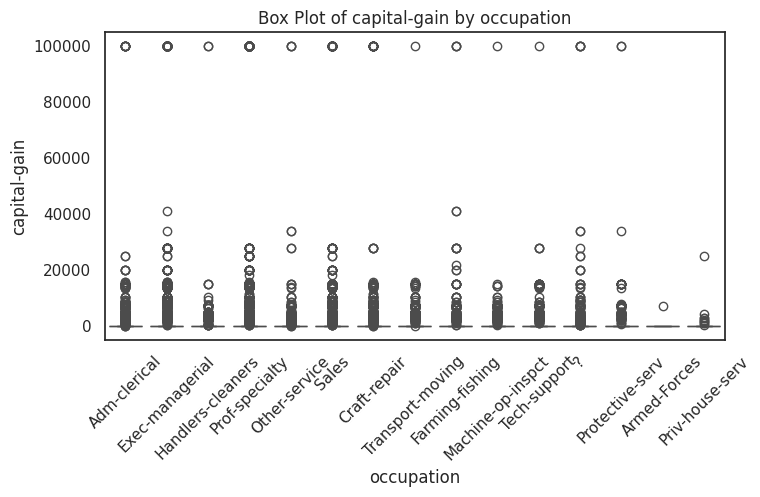

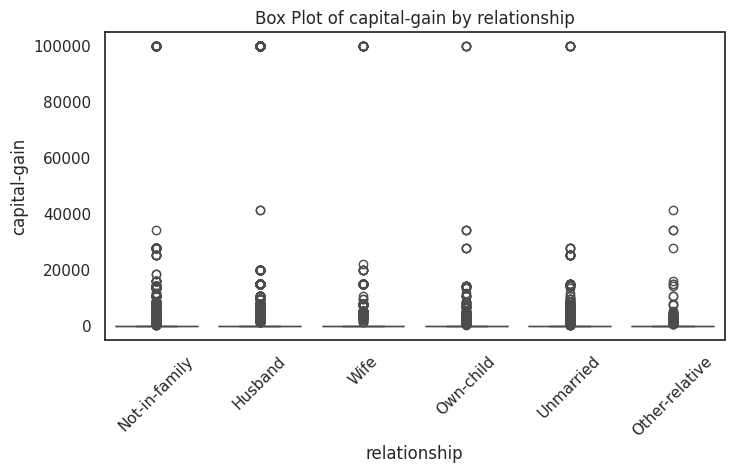

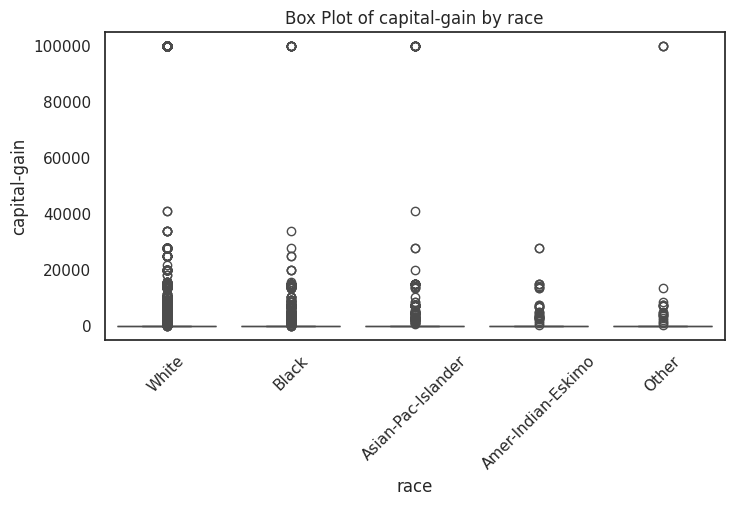

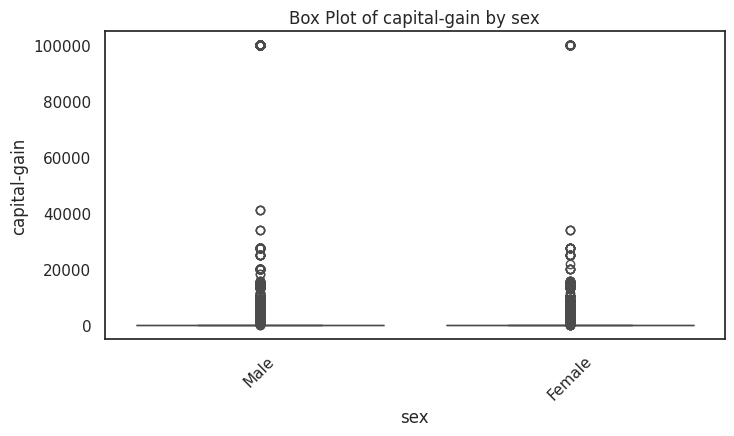

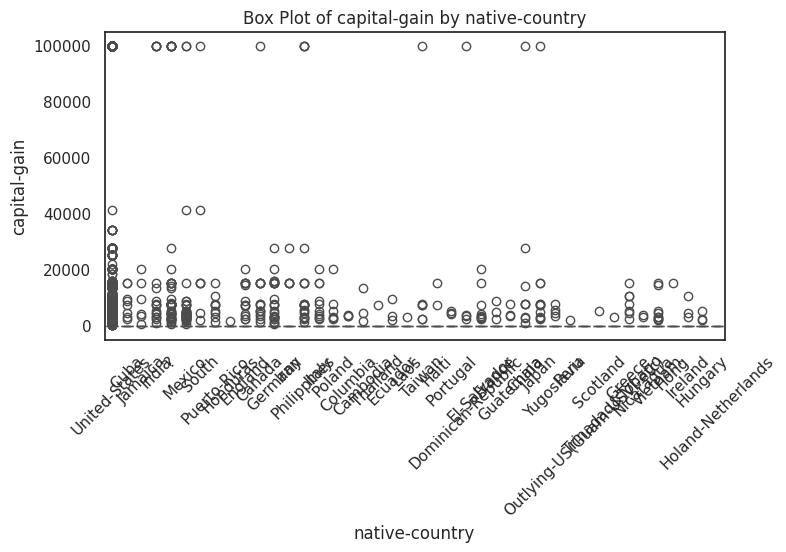

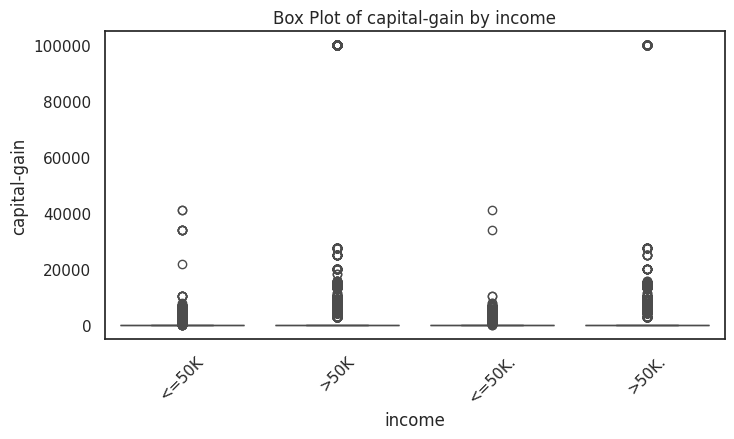

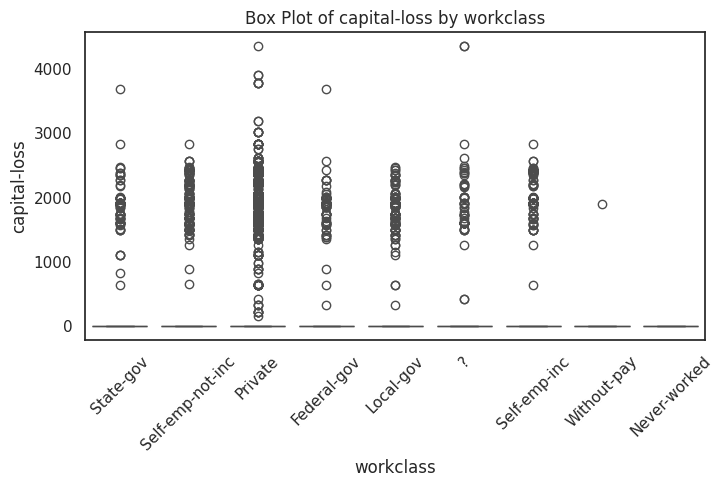

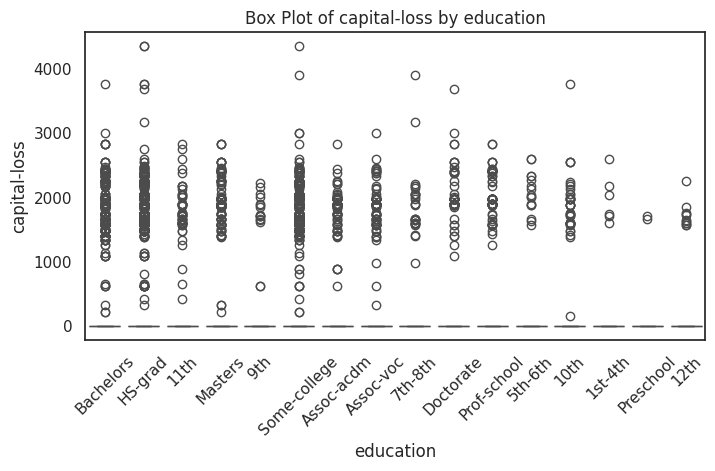

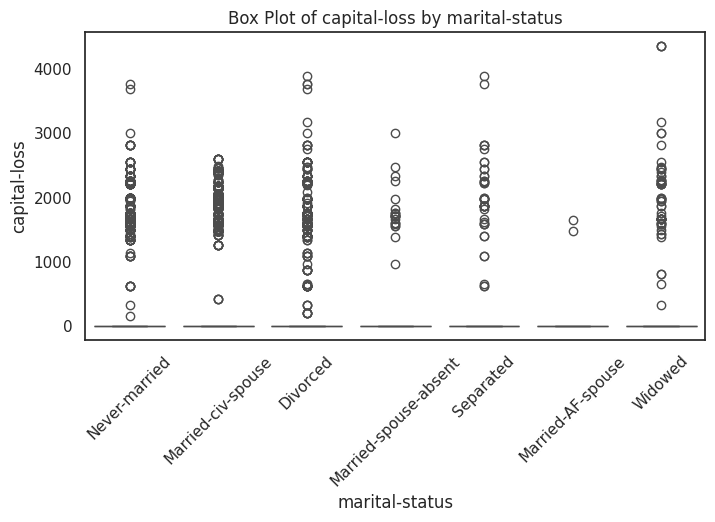

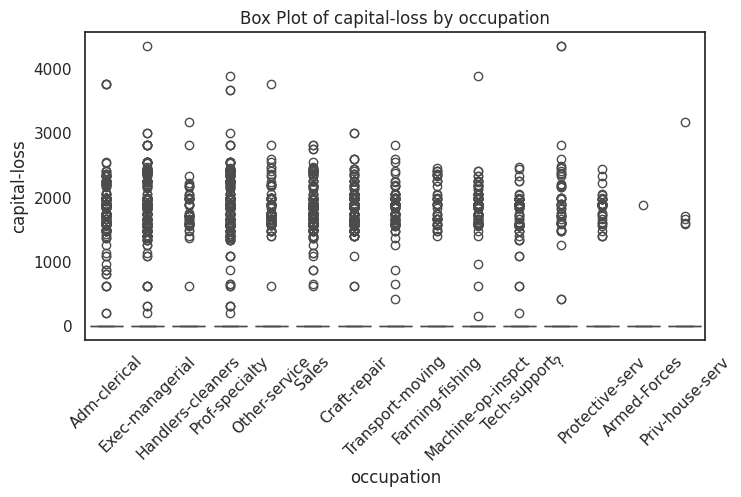

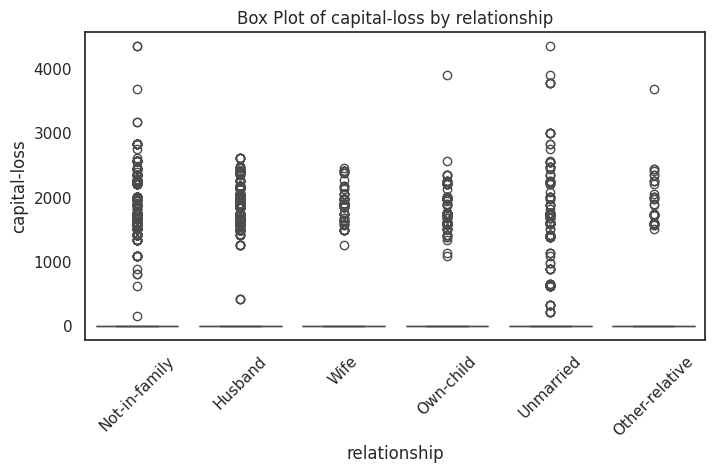

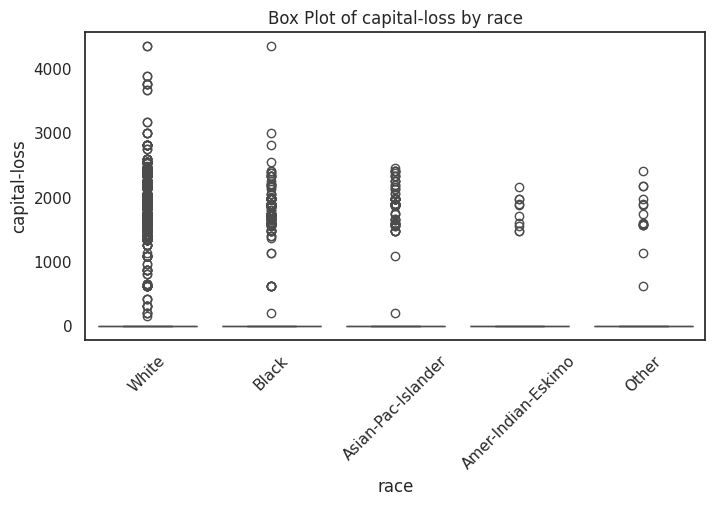

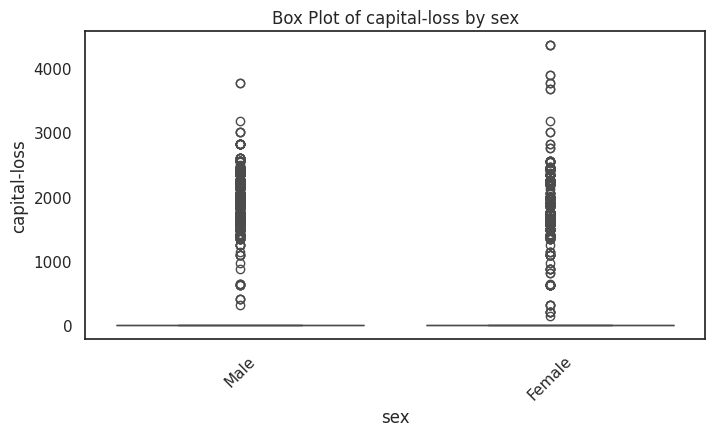

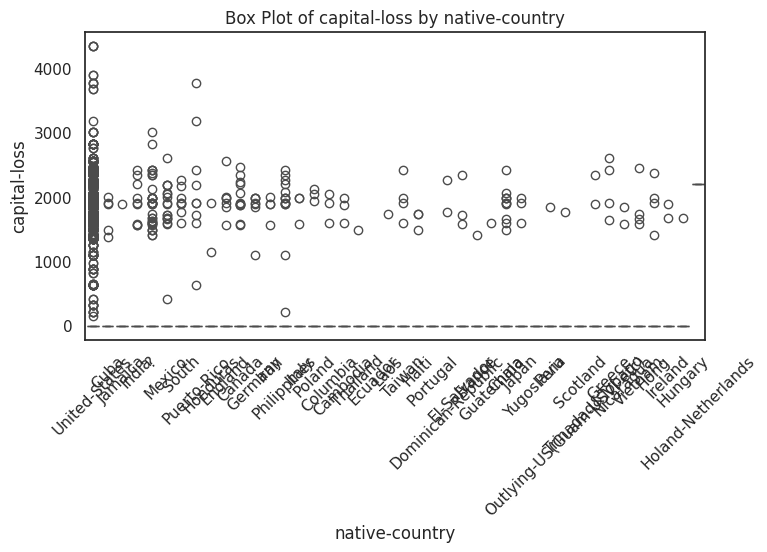

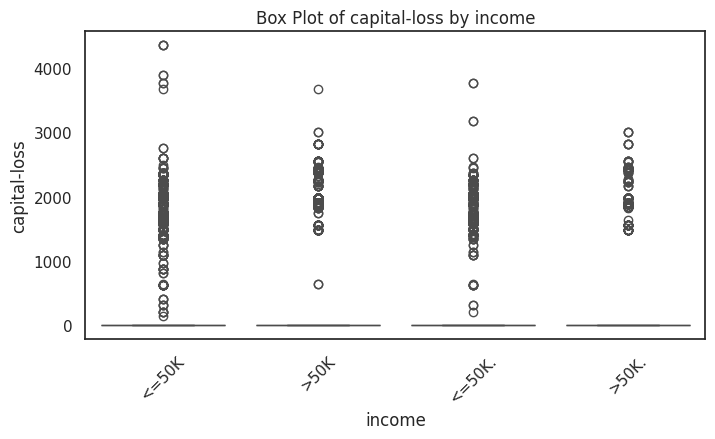

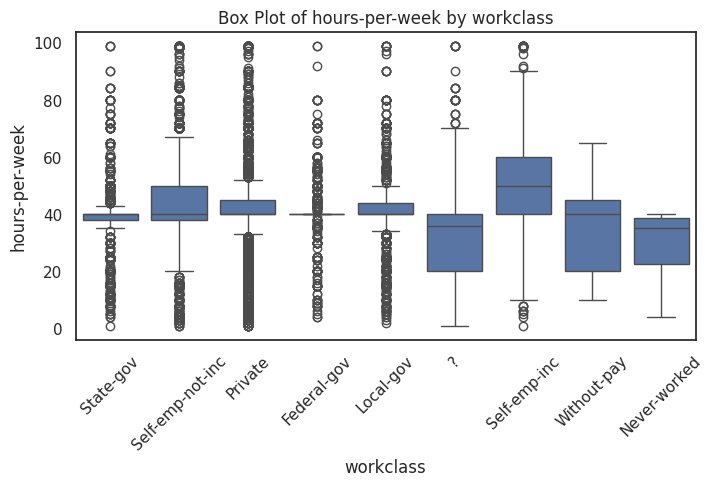

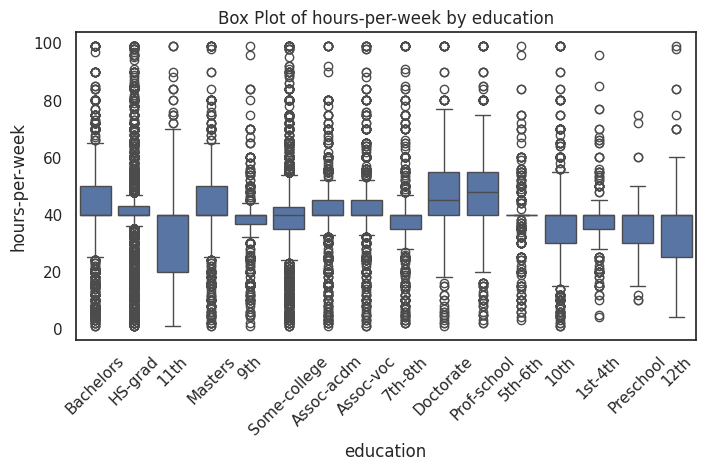

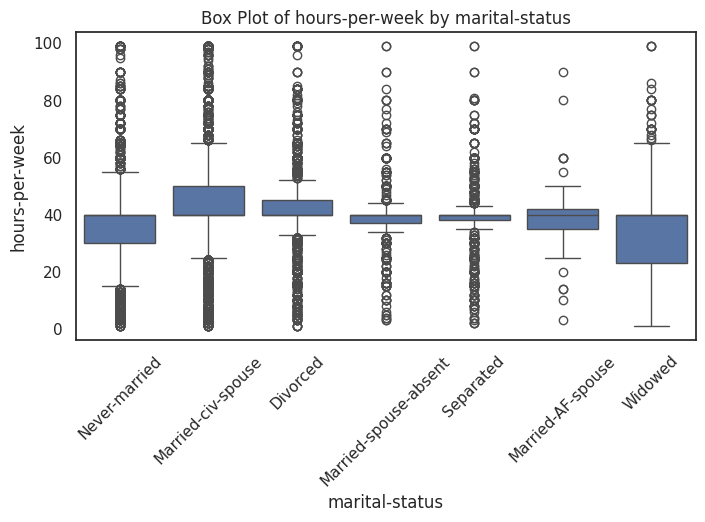

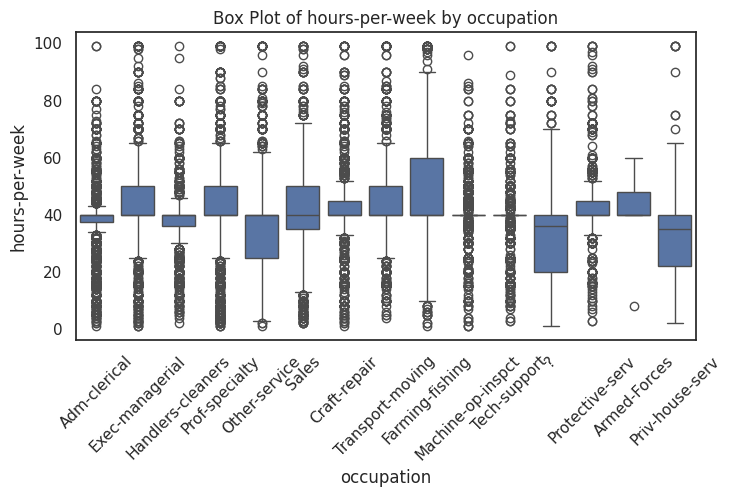

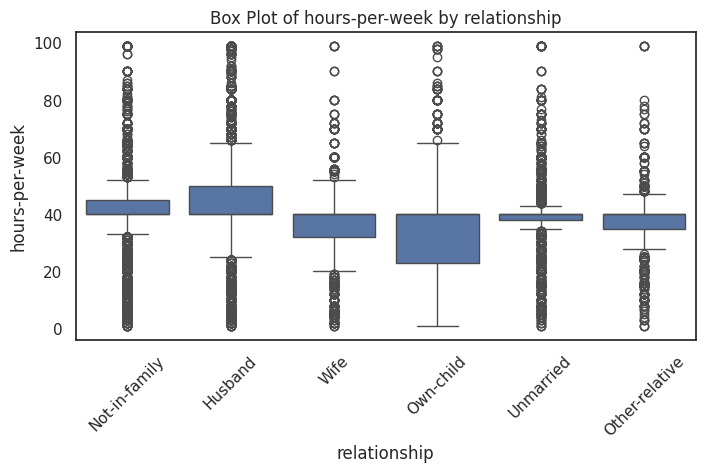

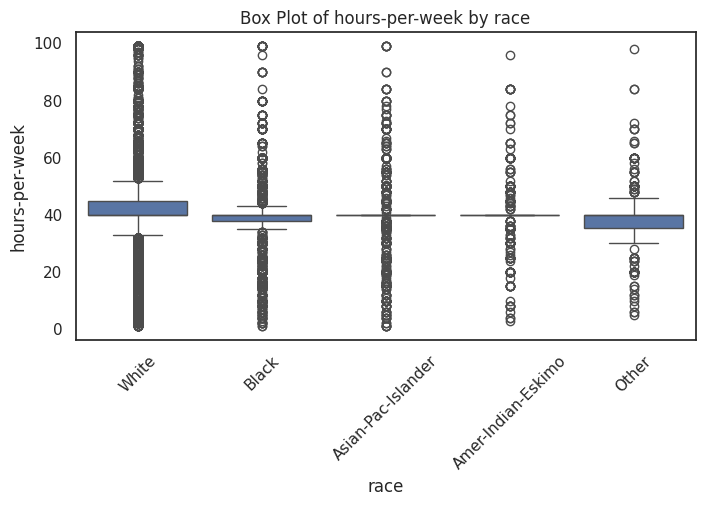

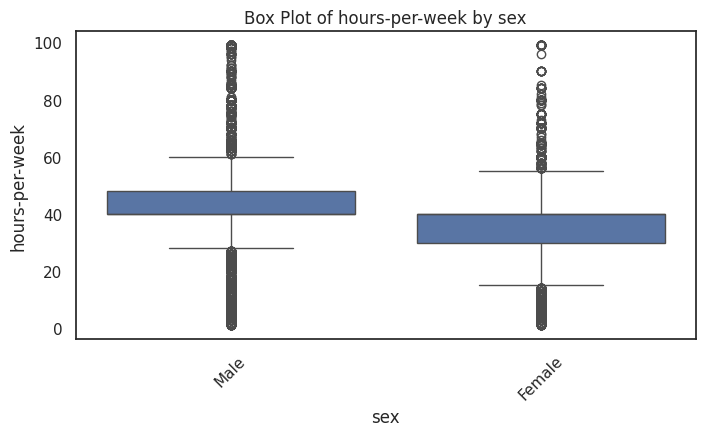

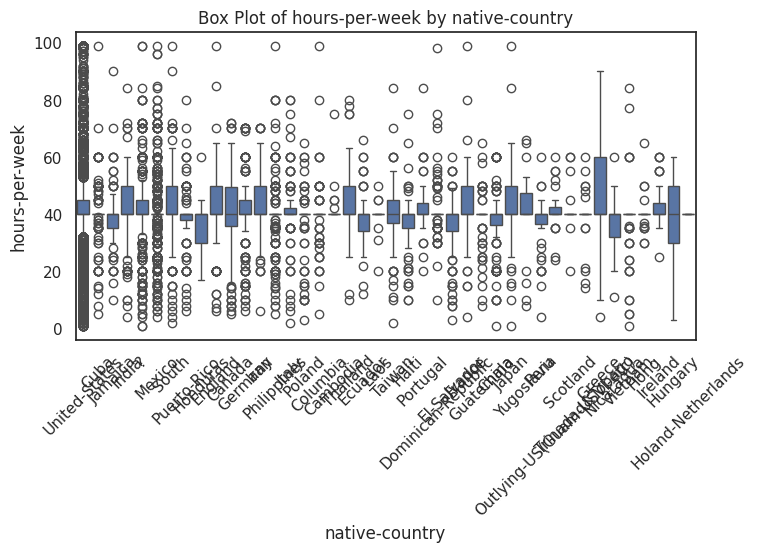

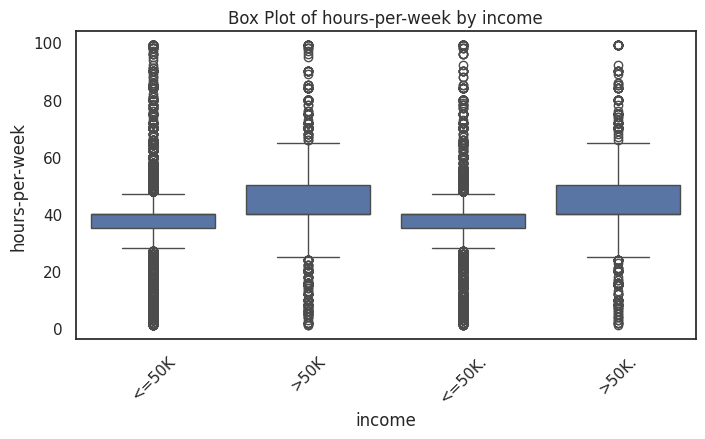

In [7]:
# Bivariate Analysis: Categorical vs Numerical (Box Plots)
def bivariate_categorical_numerical(df, target_col):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    for num_col in numerical_cols:
        for cat_col in categorical_cols:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[cat_col], y=df[num_col])
            plt.title(f'Box Plot of {num_col} by {cat_col}')
            plt.xticks(rotation=45)
            plt.show()

bivariate_categorical_numerical(adult_df, target_col='income')  # Assuming 'income' is categorical


#### 3.3 Statistical Tests

In [9]:
from scipy.stats import chi2_contingency

# Chi-Square Test: Categorical vs Categorical
def chi_square_test(df, target_col):
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        if col != target_col:
            # Create a cross-tabulation of the two categorical variables
            crosstab = pd.crosstab(df[col], df[target_col])

            # Perform the Chi-Square test
            chi2, p, dof, expected = chi2_contingency(crosstab)

            print(f'Chi-Square Test between {col} and {target_col}:')
            print(f'Chi2 Statistic: {chi2}')
            print(f'p-value: {p}')
            print(f'Degrees of Freedom: {dof}')
            print(f'Expected Frequencies:\n{expected}')
            print('\n\n')

chi_square_test(adult_df, target_col='income')


Chi-Square Test between workclass and income:
Chi2 Statistic: 2451.9360532600394
p-value: 0.0
Degrees of Freedom: 24
Expected Frequencies:
[[9.47929572e+02 4.42750600e+02 3.00676205e+02 1.44643622e+02]
 [7.39343762e+02 3.45326176e+02 2.34514338e+02 1.12815723e+02]
 [1.61912154e+03 7.56245034e+02 5.13573299e+02 2.47060131e+02]
 [5.16301510e+00 2.41149565e+00 1.63766996e+00 7.87819294e-01]
 [1.75057190e+04 8.17641713e+03 5.55268377e+03 2.67118010e+03]
 [8.75131060e+02 4.08748512e+02 2.77585058e+02 1.33535370e+02]
 [1.99395643e+03 9.31319618e+02 6.32468138e+02 3.04255812e+02]
 [1.02279329e+03 4.77717287e+02 3.24422419e+02 1.56067002e+02]
 [1.08423317e+01 5.06414086e+00 3.43910692e+00 1.65442052e+00]]



Chi-Square Test between education and income:
Chi2 Statistic: 6565.747997481039
p-value: 0.0
Degrees of Freedom: 45
Expected Frequencies:
[[7.03003153e+02 3.53634474e+02 2.22987367e+02 1.09375005e+02]
 [9.17092666e+02 4.61328774e+02 2.90894967e+02 1.42683592e+02]
 [3.32522010e+02 1.6726987

In [10]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# Correlation Analysis: Pearson, Spearman, Kendall
def correlation_tests(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for i in range(len(numerical_cols)):
        for j in range(i + 1, len(numerical_cols)):
            col1, col2 = numerical_cols[i], numerical_cols[j]

            # Pearson Correlation
            pearson_corr, pearson_p = pearsonr(df[col1], df[col2])
            # Spearman Correlation
            spearman_corr, spearman_p = spearmanr(df[col1], df[col2])
            # Kendall Correlation
            kendall_corr, kendall_p = kendalltau(df[col1], df[col2])

            print(f'Correlation between {col1} and {col2}:')
            print(f'Pearson Correlation: {pearson_corr}, p-value: {pearson_p}')
            print(f'Spearman Correlation: {spearman_corr}, p-value: {spearman_p}')
            print(f'Kendall Correlation: {kendall_corr}, p-value: {kendall_p}')
            print('\n\n\n')

correlation_tests(adult_df)


Correlation between age and fnlwgt:
Pearson Correlation: -0.07662807893178855, p-value: 1.637759384761327e-64
Spearman Correlation: -0.07750419429937262, p-value: 5.870181313692103e-66
Kendall Correlation: -0.052382502826637395, p-value: 3.5644695822359415e-66




Correlation between age and education-num:
Pearson Correlation: 0.03094037587451402, p-value: 7.955032710144095e-12
Spearman Correlation: 0.0632122643093882, p-value: 1.9607787095505234e-44
Kendall Correlation: 0.05085610633426857, p-value: 1.7051828914270099e-53




Correlation between age and capital-gain:
Pearson Correlation: 0.07722902236438103, p-value: 1.6767458105932849e-65
Spearman Correlation: 0.12443564850017708, p-value: 9.116099844857211e-168
Kendall Correlation: 0.10067709151525127, p-value: 1.565574825151622e-166




Correlation between age and capital-loss:
Pearson Correlation: 0.05694382610561194, p-value: 2.2606932678744332e-36
Spearman Correlation: 0.05758371789071025, p-value: 3.7124947223077746e-37
Kendall